In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from scipy import stats

In [8]:
data = pd.read_csv("processed_train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
data.drop_duplicates(inplace=True)

In [12]:
data.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

In [14]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [18]:
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

In [20]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [22]:
rows, columns = data.shape

print("Total no of rows:", rows)
print("Total no of columns:", columns)

Total no of rows: 8523
Total no of columns: 11


In [24]:
nominal_columns = ['Item_Fat_Content', 'Item_Type',
                   'Outlet_Location_Type', 'Outlet_Type'] 

ordinal_columns = ['Outlet_Size']  

numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']  

print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']


In [26]:
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [28]:
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [30]:
ct = make_column_transformer(
    (ohe, ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform= 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales', 'Outlet_Age'])])

In [32]:
df_encoded = ct.fit_transform(data)
df_encoded

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,onehotencoder__Item_Type_Dairy,onehotencoder__Item_Type_Frozen Foods,onehotencoder__Item_Type_Fruits and Vegetables,onehotencoder__Item_Type_Hard Drinks,...,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,ordinalencoder__Outlet_Size,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,standardscaler__Item_Outlet_Sales,standardscaler__Outlet_Age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.831187,-0.970732,1.747454,0.139541,0.910601,-0.139541
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-1.630810,-0.908111,-1.489023,1.334103,-1.018440,-1.334103
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.108727,-0.956917,0.010040,0.139541,-0.049238,-0.139541
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.510904,-1.281758,0.660050,0.020085,-0.849103,-0.020085
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,-1.407246,-0.181193,1.180783,-1.293934,0.349915,1.293934
8519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-1.048835,-0.371154,-0.527301,0.497909,-0.956402,-0.497909
8520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.523639,-0.599784,-0.897208,0.736822,-0.579100,-0.736822
8521,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-1.325628,1.532880,-0.607977,1.334103,-0.196725,-1.334103


In [34]:
rows, columns = df_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 32


In [36]:
pd.set_option('display.max_columns', None)
print("Encoded Columns:\n", df_encoded.columns.tolist())

Encoded Columns:
 ['onehotencoder__Item_Fat_Content_Low Fat', 'onehotencoder__Item_Fat_Content_Regular', 'onehotencoder__Item_Type_Baking Goods', 'onehotencoder__Item_Type_Breads', 'onehotencoder__Item_Type_Breakfast', 'onehotencoder__Item_Type_Canned', 'onehotencoder__Item_Type_Dairy', 'onehotencoder__Item_Type_Frozen Foods', 'onehotencoder__Item_Type_Fruits and Vegetables', 'onehotencoder__Item_Type_Hard Drinks', 'onehotencoder__Item_Type_Health and Hygiene', 'onehotencoder__Item_Type_Household', 'onehotencoder__Item_Type_Meat', 'onehotencoder__Item_Type_Others', 'onehotencoder__Item_Type_Seafood', 'onehotencoder__Item_Type_Snack Foods', 'onehotencoder__Item_Type_Soft Drinks', 'onehotencoder__Item_Type_Starchy Foods', 'onehotencoder__Outlet_Location_Type_Tier 1', 'onehotencoder__Outlet_Location_Type_Tier 2', 'onehotencoder__Outlet_Location_Type_Tier 3', 'onehotencoder__Outlet_Type_Grocery Store', 'onehotencoder__Outlet_Type_Supermarket Type1', 'onehotencoder__Outlet_Type_Supermarket 

In [38]:
simplified_column_names = {
    'onehotencoder__Item_Fat_Content_Low Fat': 'Fat_Low',
    'onehotencoder__Item_Fat_Content_Regular': 'Fat_Regular',
    'onehotencoder__Item_Type_Baking Goods': 'Type_Baking',
    'onehotencoder__Item_Type_Breads': 'Type_Breads',
    'onehotencoder__Item_Type_Breakfast': 'Type_Breakfast',
    'onehotencoder__Item_Type_Canned': 'Type_Canned',
    'onehotencoder__Item_Type_Dairy': 'Type_Dairy',
    'onehotencoder__Item_Type_Frozen Foods': 'Type_Frozen',
    'onehotencoder__Item_Type_Fruits and Vegetables': 'Type_Fruits',
    'onehotencoder__Item_Type_Hard Drinks': 'Type_HardDrinks',
    'onehotencoder__Item_Type_Health and Hygiene': 'Type_Health_Hygiene',
    'onehotencoder__Item_Type_Household': 'Type_Household',
    'onehotencoder__Item_Type_Meat': 'Type_Meat',
    'onehotencoder__Item_Type_Others': 'Type_Others',
    'onehotencoder__Item_Type_Seafood': 'Type_Seafood',
    'onehotencoder__Item_Type_Snack Foods': 'Type_SnackFoods',
    'onehotencoder__Item_Type_Soft Drinks': 'Type_SoftDrinks',
    'onehotencoder__Item_Type_Starchy Foods': 'Type_StarchyFoods',
    'onehotencoder__Outlet_Location_Type_Tier 1': 'Location_Tier1',
    'onehotencoder__Outlet_Location_Type_Tier 2': 'Location_Tier2',
    'onehotencoder__Outlet_Location_Type_Tier 3': 'Location_Tier3',
    'onehotencoder__Outlet_Type_Grocery Store': 'Outlet_GroceryStore',
    'onehotencoder__Outlet_Type_Supermarket Type1': 'Outlet_Supermarket1',
    'onehotencoder__Outlet_Type_Supermarket Type2': 'Outlet_Supermarket2',
    'onehotencoder__Outlet_Type_Supermarket Type3': 'Outlet_Supermarket3',
    'ordinalencoder__Outlet_Size': 'Outlet_Size',
    'standardscaler__Item_Weight': 'Item_Weight',
    'standardscaler__Item_Visibility': 'Item_Visibility',
    'standardscaler__Item_MRP': 'Item_MRP',
    'standardscaler__Outlet_Establishment_Year': 'Outlet_Establishment_Year',
    'standardscaler__Item_Outlet_Sales': 'Item_Outlet_Sales',
    'standardscaler__Outlet_Age': 'Outlet_Age'
}

df_encoded.rename(columns=simplified_column_names, inplace=True)

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


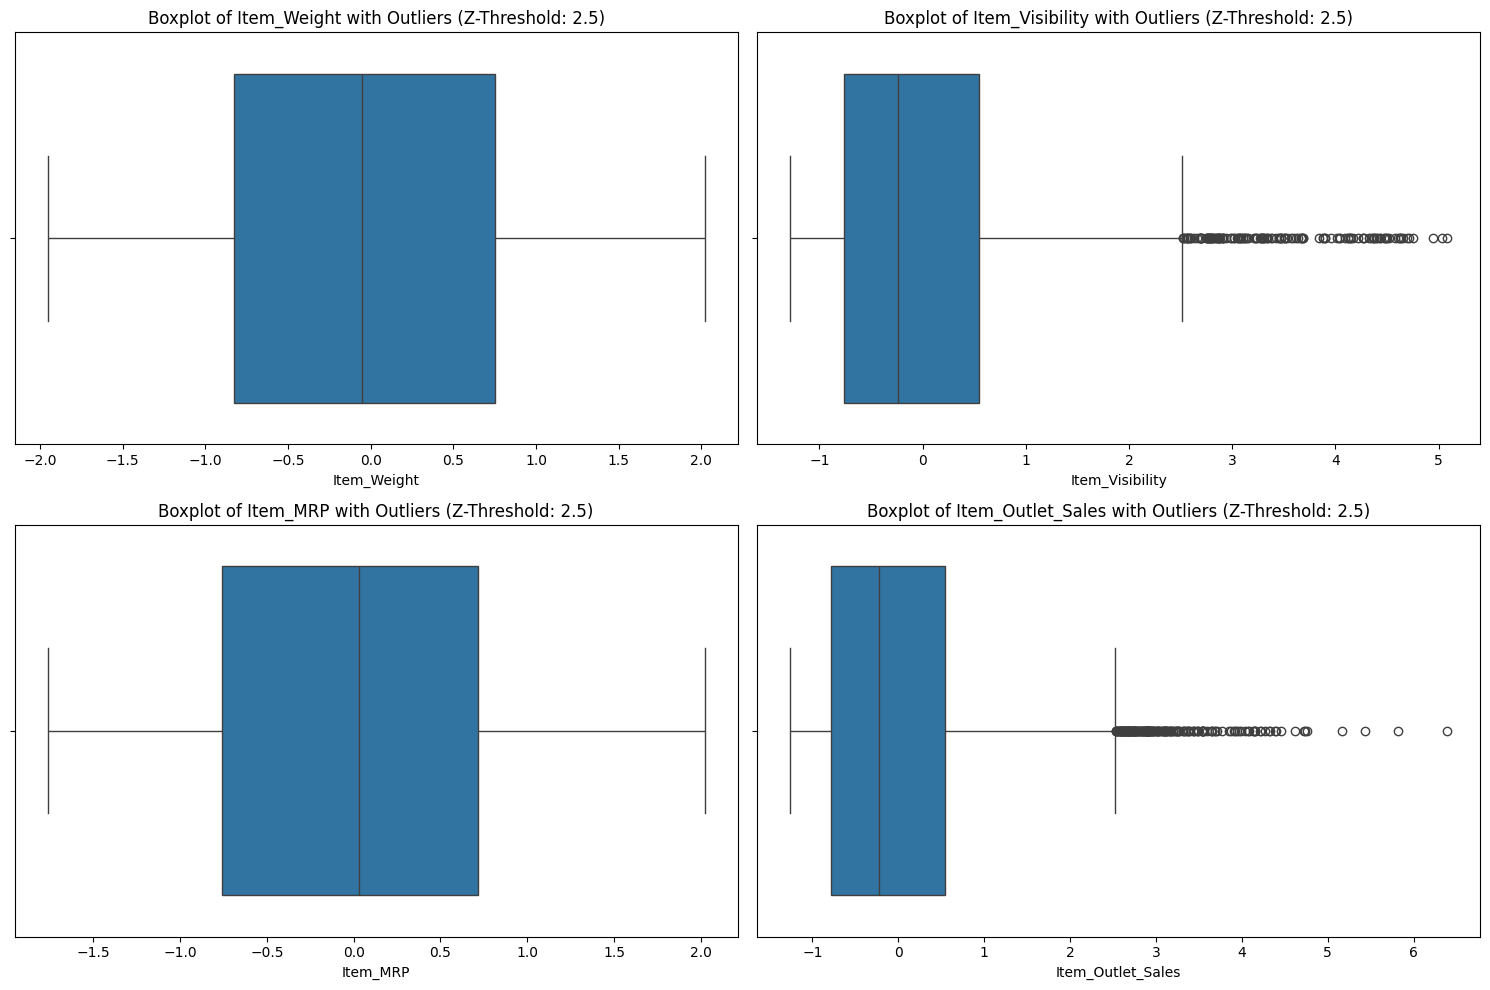

In [40]:
# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5 

# Dictionary to store detected outliers
outliers_dict = {}

# Calculating Z-scores and identifing the outliers
for col in continuous_columns:
    df_encoded[col + '_zscore'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculating Z-score with its formula
    outliers_dict[col] = df_encoded[df_encoded[col + '_zscore'] > z_threshold]  # Storing outliers
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")


plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of plots
    sns.boxplot(x=df_encoded[col])  # Boxplot for the column
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')  
plt.tight_layout()
plt.show()

In [42]:
z_threshold = 2.5
outliers_removed = df_encoded[df_encoded['Item_Outlet_Sales_zscore'] <= z_threshold]

print(f"Original dataset size: {df_encoded.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")

Original dataset size: (8523, 36)
Dataset size after removing outliers: (8326, 36)


In [44]:
outliers_removed.isnull().sum()

Fat_Low                      0
Fat_Regular                  0
Type_Baking                  0
Type_Breads                  0
Type_Breakfast               0
Type_Canned                  0
Type_Dairy                   0
Type_Frozen                  0
Type_Fruits                  0
Type_HardDrinks              0
Type_Health_Hygiene          0
Type_Household               0
Type_Meat                    0
Type_Others                  0
Type_Seafood                 0
Type_SnackFoods              0
Type_SoftDrinks              0
Type_StarchyFoods            0
Location_Tier1               0
Location_Tier2               0
Location_Tier3               0
Outlet_GroceryStore          0
Outlet_Supermarket1          0
Outlet_Supermarket2          0
Outlet_Supermarket3          0
Outlet_Size                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Wei

In [46]:
pd.set_option('display.max_columns', None)

# Display all column names
print(outliers_removed.columns.tolist())

['Fat_Low', 'Fat_Regular', 'Type_Baking', 'Type_Breads', 'Type_Breakfast', 'Type_Canned', 'Type_Dairy', 'Type_Frozen', 'Type_Fruits', 'Type_HardDrinks', 'Type_Health_Hygiene', 'Type_Household', 'Type_Meat', 'Type_Others', 'Type_Seafood', 'Type_SnackFoods', 'Type_SoftDrinks', 'Type_StarchyFoods', 'Location_Tier1', 'Location_Tier2', 'Location_Tier3', 'Outlet_GroceryStore', 'Outlet_Supermarket1', 'Outlet_Supermarket2', 'Outlet_Supermarket3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Weight_zscore', 'Item_Visibility_zscore', 'Item_MRP_zscore', 'Item_Outlet_Sales_zscore']


In [50]:
scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Standardizing the columns
scaler = StandardScaler()
outliers_removed.loc[:, scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

# Display the head of the updated DataFrame
outliers_removed.head()


,Fat_Low,Fat_Regular,Type_Baking,Type_Breads,Type_Breakfast,Type_Canned,Type_Dairy,Type_Frozen,Type_Fruits,Type_HardDrinks,Type_Health_Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_SnackFoods,Type_SoftDrinks,Type_StarchyFoods,Location_Tier1,Location_Tier2,Location_Tier3,Outlet_GroceryStore,Outlet_Supermarket1,Outlet_Supermarket2,Outlet_Supermarket3,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.826565,-0.971109,1.800763,0.139541,1.122235,-0.139541,0.831138,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.621276,-0.908784,-1.476024,1.334103,-1.074526,-1.334103,1.630714,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.101430,-0.957359,0.041710,0.139541,0.029187,-0.139541,1.108662,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.501136,-1.280664,0.699815,0.020085,-0.881687,-0.020085,1.510816,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,-0.913560,-1.280664,-1.385102,-1.293934,-0.706622,1.293934,0.918665,1.281683,1.399138,0.695332


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaling to certain numerical features
min_max_scaler = MinMaxScaler()
data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])

# scaled data
data[['Item_MRP', 'Item_Visibility']].head()

,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


In [54]:
outliers_removed.to_csv('C:\\Users\\theam\\OneDrive\\Desktop\\dataset\\df_cleaned.csv', index=False)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

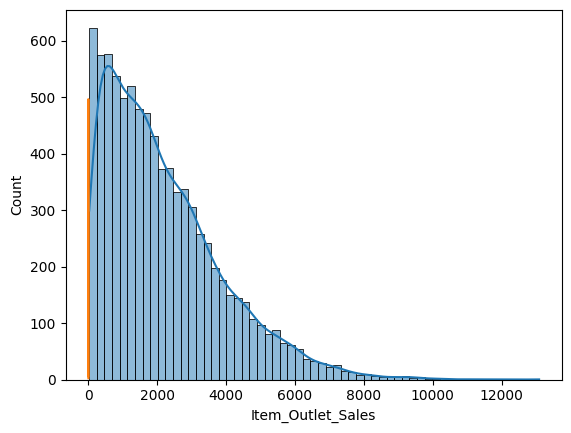

In [56]:
sns.histplot(data['Item_Outlet_Sales'], kde=True)

data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)
